In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"C:\Users\user\Downloads\iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].median())

In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [8]:
corr_matrix = data.corr()

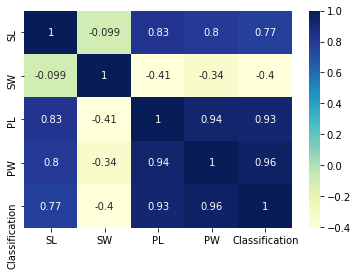

In [9]:
sns.heatmap(corr_matrix,annot= True, cmap = 'YlGnBu')
plt.show()

In [10]:

data.drop('PL', axis=1, inplace =True)

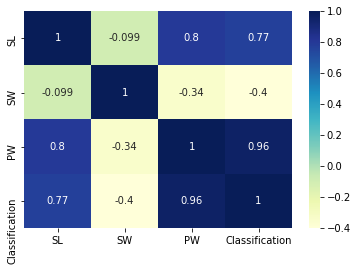

In [11]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot= True, cmap = 'YlGnBu')
plt.show()

In [12]:
# Scaling the dataset

In [13]:
x =  data.drop(['Classification'],axis=1)
y = data['Classification']

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
x1 = min_max.fit_transform(x)

In [15]:
#Linear Regression

In [16]:
x1 = pd.DataFrame(x1)
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y,test_size = 0.2, random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
model = lin_regressor.fit(x1_train,y1_train)

In [18]:
prediction_1 = model.predict(x1_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE =',mean_squared_error(y1_test,prediction_1))
print('R Squared value = ',r2_score(y1_test,prediction_1))

MSE = 0.03948113450816139
R Squared value =  0.9435087105606593


In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x2 = std_scaler.fit_transform(x)

In [21]:
x2 = pd.DataFrame(x2)

In [22]:
x2_train,x2_test,y2_train,y2_test= train_test_split(x2,y,test_size = 0.2, random_state = 42)

In [23]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
model = lin_regressor.fit(x2_train,y2_train)

In [24]:
prediction_2 = model.predict(x2_test)

In [28]:
print('MSE =',mean_squared_error(y2_test,prediction_2))
print('R Squared value = ',r2_score(y2_test,prediction_2))

MSE = 0.03948113450816134
R Squared value =  0.9435087105606594


In [29]:
#Logistic regression

In [30]:
x_train, x_test, y_train, y_test = train_test_split (x1,y,test_size = 0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

In [31]:
prediction = model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test, prediction)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [33]:
print('Accuracy = ',accuracy_score(y_test,prediction))

Accuracy =  0.9666666666666667


In [34]:
# K nearest neighbor 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors =np.arange(3,15)
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors = k, metric ='euclidean')
    classifier.fit(x_train, y_train)
    y_prediction =classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

In [36]:
## SVM Model

In [37]:
from sklearn.svm import SVC
svmclf = SVC()
svmclf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_pred = svmclf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is  0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [40]:
# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf =DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_pred= dt_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is  0.9333333333333333
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [43]:
# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred = rf_clf.predict(x_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is  0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
